In [12]:
# Imports. We only need h80 for the class based approach
from paratc.tc_models import Holland1980 as h80
from paratc import make_example_data
import warnings 
warnings.filterwarnings('ignore')

# Open example track and generate example grid
track, grid_lon, grid_lat = make_example_data()
track

,lon,lat,pcen,penv,rmw,time
0,-81.4,23.80,990,1013,50,2016-08-28 18:00:00
1,-81.9,23.56,970,1013,50,2016-08-28 21:00:00
2,-82.4,23.40,940,1013,75,2016-08-29 00:00:00
3,-82.9,23.36,980,1013,100,2016-08-29 03:00:00
4,-83.3,23.40,1005,1013,0,2016-08-29 06:00:00


`track` is a pandas dataframe containing tropical cyclone track data. We pass this to `Holland1980()` alongside our 2D grid longitudes and latitudes. The class will then check the track dataframe for needed variables. In the case of `Holland1980()`, the B shape parameter is needed. You can calculate this yourself (using one of the functions in Holland1980), or provide `B_model` to `Holland1980()`, as below.

Our new `storm` object will contain a `data` variable in the form of an xarray dataset. This contains our `grid_lon` and `grid_lat` variables, as well as our initial storm pressure, windspeed and wind components.

In [13]:
# Create storm instance and look at dataset
storm = h80( track, grid_lon, grid_lat, B_model='vickery00' )
storm.data

<xarray.Dataset>
Dimensions:    (time: 5, y: 60, x: 100)
Coordinates:
  * time       (time) datetime64[ns] 2016-08-28T18:00:00 ... 2016-08-29T06:00:00
    lon        (y, x) float64 -89.0 -88.9 -88.8 -88.7 ... -79.3 -79.2 -79.1
    lat        (y, x) float64 21.0 21.0 21.0 21.0 21.0 ... 26.9 26.9 26.9 26.9
Dimensions without coordinates: y, x
Data variables:
    dist_cent  (time, y, x) float64 840.9 831.3 821.8 ... 559.9 567.2 574.5
    pressure   (time, y, x) float64 1.013e+03 1.013e+03 ... 1.013e+03 1.013e+03
    windspeed  (time, y, x) float64 0.5999 0.6168 0.6344 0.6526 ... 0.0 0.0 0.0
    wind_u     (time, y, x) float64 0.2074 0.2157 0.2245 ... -0.0 -0.0 -0.0
    wind_v     (time, y, x) float64 -0.5629 -0.5778 -0.5933 ... 0.0 0.0 0.0
Attributes:
    tc_model:      Holland1980
    tc_B_model:    vickery00
    inflow_model:  constant
    inflow_angle:  0

We can also check the `storm`'s `track` attribute. This is a copy of the track dataframe, however you will see that it now has a `B` column, translation speeds, `pdelta` and `timestep`:

In [14]:
storm.track

,lon,lat,pcen,penv,rmw,time,pdelta,timestep,utrans,vtrans,trans_speed,B
0,-81.4,23.80,990,1013,50,2016-08-28 18:00:00,23,0.0,0.000000,0.000000,NaN,1.49218
1,-81.9,23.56,970,1013,50,2016-08-28 21:00:00,43,3.0,-4.798996,-2.303518,5.323209,1.45538
2,-82.4,23.40,940,1013,75,2016-08-29 00:00:00,73,3.0,-4.763240,-1.524237,5.001175,1.47743
3,-82.9,23.36,980,1013,100,2016-08-29 03:00:00,33,3.0,-4.728418,-0.378273,4.743524,1.62828
4,-83.3,23.40,1005,1013,0,2016-08-29 06:00:00,8,3.0,-3.783985,0.378399,3.802858,1.36528


Let's use `.plot()` to take a look at a snapshot of the storm:

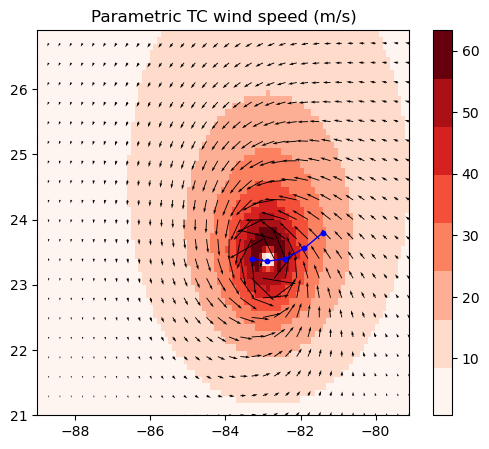

In [18]:
# Plot storm windspeed at timestep 3
storm.plot(3)

We can see that the windfield is perfectly symmetric, with no inflow towards the storm center. This is because no inflow angle model or background flow model has been applied yet. Let's do that:

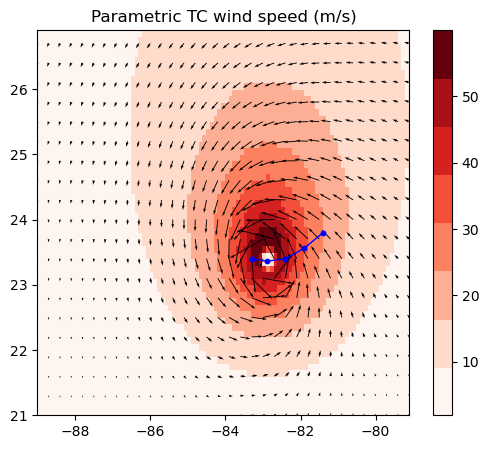

In [19]:
# Scale winds to surface level
storm.scale_winds( 0.91 )

# Apply piecewise inflow angle model
storm.make_wind_vectors( inflow_model = 'wang20' )

# Add background winds using reciprocal relationship, 55% scaling and 20 degree rotation
storm.add_background_winds( bg_alpha = .55, bg_beta = 20 )

# Plot new storm
storm.plot(3)

There are other options for all models. Take a look into their respective modules for a full list.